# K-Means Clustering: Model Selection and Analysis

Objective:
Apply K-Means clustering, determine the optimal number of clusters, and analyze the impact of different k values.

Focus:
- Elbow Method
- Silhouette Score
- Cluster interpretation and trade-offs

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv(r'D:\Bridgeon\TASK\Customer_Segmentation_Clustering\data\Mall_Customers.csv')

X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


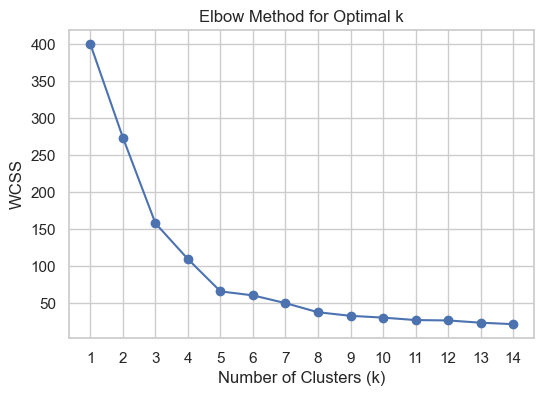

In [11]:
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.plot(range(1, 15), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.xticks(range(1,15))

plt.show()


## Elbow Method Interpretation

- WCSS decreases as k increases
- The rate of decrease slows significantly around **k = 5**
- This point represents a balance between compact clusters and model simplicity

The elbow method suggests **k ≈ 5** as a reasonable choice.

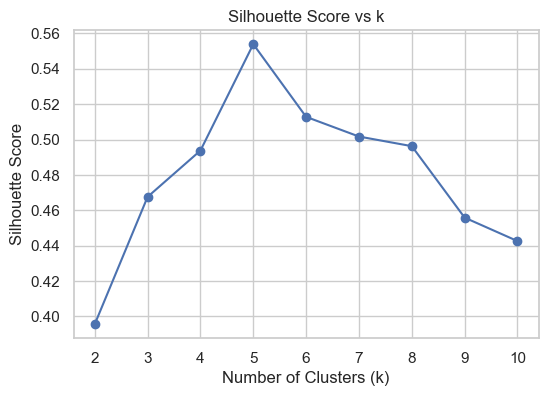

In [ ]:
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(6,4))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")
plt.show()

## Silhouette Score Interpretation

- Higher silhouette score indicates better-defined clusters
- Scores peak around **k = 5**

Silhouette analysis supports the elbow method result.

## Final Choice of Number of Clusters

Based on:
- Elbow Method
- Silhouette Score
- Visual interpretability

**k = 5** is selected as the optimal number of clusters.

This choice balances:
- Cluster compactness
- Separation
- Business interpretability

In [13]:
kmeans_final = KMeans(n_clusters=5, random_state=42)
df["KMeans_Cluster"] = kmeans_final.fit_predict(X)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


## Effect of Changing k

- Decreasing k results in broader and simpler clusters but may merge distinct customer behaviors.  
- Increasing k creates more detailed clusters but can lead to noisy segments and unnecessary complexity.  

Choosing k is a balance between meaningful segmentation and simplicity.

## Trade-Off in Choosing k

As k increases, WCSS continuously decreases, meaning clusters fit the data better, but the improvement becomes marginal after k = 5.
At the same time, the Silhouette Score peaks at k = 5 and then declines, showing that adding more clusters reduces cluster separation.

The trade-off is between model complexity and cluster quality: lower k may underfit by grouping different customers together, while higher k overfits by creating smaller, less meaningful clusters.

### Conclusion

- K-Means clustering successfully segmented customers
- k = 5 offers the best balance between structure and usability
- Cluster labels are ready for visualization and business interpretation

Next Step:
Cluster visualization and geometric 